In [1]:
from blockchain import blockexplorer
from blockchain import exchangerates

In [2]:
add_list = [
    "115p7UMMngoj1pMvkpHijcRdfJNXj6LrLn",
    "12t9YDPgwueZ9NyMgw519p7AA8isjr6SMw",
    "13AM4VW2dhxYgXeQepoHkHSQuy6NgaEb94"]

In [3]:
ticker = exchangerates.get_ticker()
curr_price = ticker['USD'].p15min

print(curr_price)

1772.01


In [4]:
total_satoshi = 0.0
total_tx = 0

data = []

for add_str in add_list:
    nextpage = True
    offset = 0
    
    while nextpage:  # !!
        
        address = blockexplorer.get_address(add_str, api_code = "&offset={}".format(offset)) # !!
        address_dict = vars(address)
        tx_list = address_dict['transactions']

        if offset == 0: # first page
            total_satoshi += address_dict['total_received']
            total_tx += address_dict['n_tx']

        for tx in tx_list:
            tx_dict = vars(tx)
            time = tx_dict['time']

            output_list = tx_dict['outputs']
            for output in output_list:
                o_dict = vars(output)

                if o_dict['address'] == add_str: # !!
                    if o_dict['value']*curr_price*(10**-8) > 10: # discard small values  # !!
                        data.append((time, o_dict['value']))
                    
        # next page of tx, api can only show 50 txs in one query
        if address_dict['n_tx'] > offset + 50:
            offset += 50
            nextpage = True
        else:
            nextpage = False

In [5]:
print("Length of Data:", len(data))
print("Total Tx: {}".format(total_tx)) 

print("Total BTC: {}".format(total_satoshi*(10**-8)))
print("Total USD: {:.2f}".format(total_satoshi*curr_price*(10**-8)))

Length of Data: 219
Total Tx: 283
Total BTC: 43.09654588
Total USD: 76367.51


In [6]:
import pandas as pd
import time

data.sort(key = lambda tup: tup[0])

df = pd.DataFrame(data, columns=['Epoch', 'satoshi'])
df['Datetime'] = df['Epoch'].apply(lambda t: pd.to_datetime(t, unit='s'))
df['USD'] = df['satoshi'].apply(lambda s: s*curr_price*10**(-8))
df.index = df['Datetime']
print(df.dtypes)

Epoch                int64
satoshi              int64
Datetime    datetime64[ns]
USD                float64
dtype: object


In [7]:
df.head()

,Epoch,satoshi,Datetime,USD
Datetime,,,,
2017-05-12 12:04:11,1494590651,31799917,2017-05-12 12:04:11,563.497709
2017-05-12 12:33:55,1494592435,16321544,2017-05-12 12:33:55,289.219392
2017-05-12 13:50:47,1494597047,16850000,2017-05-12 13:50:47,298.583685
2017-05-12 13:53:35,1494597215,21856538,2017-05-12 13:53:35,387.300039
2017-05-12 14:02:29,1494597749,17112000,2017-05-12 14:02:29,303.226351


In [8]:
df = df.drop(['Datetime', 'Epoch', 'satoshi'], axis=1)
df.tail()

,USD
Datetime,
2017-05-16 23:01:33,211.400793
2017-05-17 00:35:15,304.867179
2017-05-17 02:08:24,300.922738
2017-05-17 04:48:49,590.866102
2017-05-17 05:37:13,299.711764


In [9]:
df_HC = df.resample('H').count()
df_HC.columns = ["Tx"]
df_HC

,Tx
Datetime,
2017-05-12 12:00:00,2
2017-05-12 13:00:00,2
2017-05-12 14:00:00,2
2017-05-12 15:00:00,4
2017-05-12 16:00:00,0
2017-05-12 17:00:00,1
2017-05-12 18:00:00,7
2017-05-12 19:00:00,1
2017-05-12 20:00:00,2


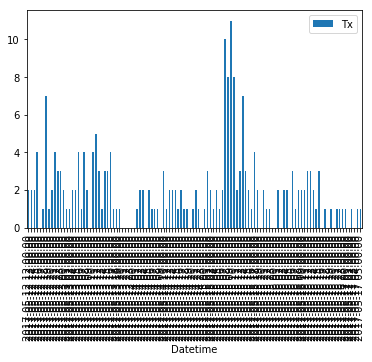

In [10]:
%matplotlib inline

df_HC.plot(kind="bar") # kind

In [11]:
df_HS = df.resample('H').sum()
df_HS = df_HS.fillna(0.0)
df_HS

,USD
Datetime,
2017-05-12 12:00:00,852.717101
2017-05-12 13:00:00,685.883724
2017-05-12 14:00:00,569.027851
2017-05-12 15:00:00,1177.745360
2017-05-12 16:00:00,0.000000
2017-05-12 17:00:00,297.040052
2017-05-12 18:00:00,2615.212329
2017-05-12 19:00:00,319.281116
2017-05-12 20:00:00,630.374607


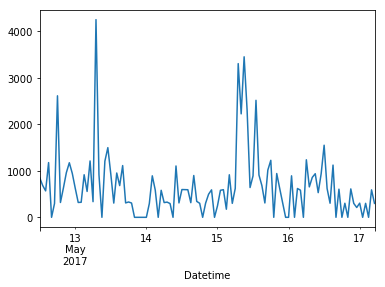

In [12]:
df_HS["USD"].plot()

76367.5102648188


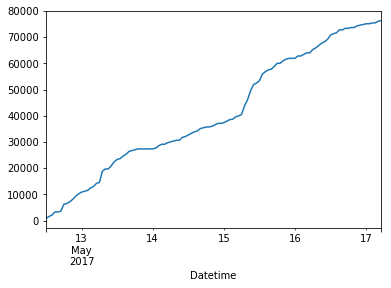

In [13]:
df_HCS = df.resample('H').sum().fillna(0.0).cumsum()

tt_usd = total_satoshi*(10**-8)*curr_price

df_HCS["USD"].plot()

print(tt_usd)

In [14]:
print(df_HCS)

                              USD
Datetime                         
2017-05-12 12:00:00    852.717101
2017-05-12 13:00:00   1538.600825
2017-05-12 14:00:00   2107.628676
2017-05-12 15:00:00   3285.374036
2017-05-12 16:00:00   3285.374036
2017-05-12 17:00:00   3582.414088
2017-05-12 18:00:00   6197.626416
2017-05-12 19:00:00   6516.907533
2017-05-12 20:00:00   7147.282140
2017-05-12 21:00:00   8109.512524
2017-05-12 22:00:00   9284.019199
2017-05-12 23:00:00  10228.950867
2017-05-13 00:00:00  10853.811210
2017-05-13 01:00:00  11173.481814
2017-05-13 02:00:00  11497.336133
2017-05-13 03:00:00  12413.465303
2017-05-13 04:00:00  12970.279646
2017-05-13 05:00:00  14183.291142
2017-05-13 06:00:00  14519.973042
2017-05-13 07:00:00  18774.303817
2017-05-13 08:00:00  19693.814071
2017-05-13 09:00:00  19693.814071
2017-05-13 10:00:00  20902.522452
2017-05-13 11:00:00  22401.947698
2017-05-13 12:00:00  23331.328047
2017-05-13 13:00:00  23637.801660
2017-05-13 14:00:00  24591.437052
2017-05-13 15: